In [1]:
import pandas as pd
import numpy as np

# 연속 로그 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

import multiprocessing as mp

from itertools import permutations, combinations
import matplotlib.pyplot as plt

In [2]:
def get_num_ea(list_nums):
    dict_ea = {}
    
    seq_ea = 0
    for num in zip(list_nums, list_nums[1:]):
        if num[1] - num[0] == 1:
            seq_ea += 1
    dict_ea['SEQ_EA'] = seq_ea
            
    even_ea = 0
    for num in list_nums:
        if num % 2 == 0:
            even_ea += 1
    dict_ea['ODD_EA'] = len(list_nums) - even_ea
    dict_ea['EVEN_EA'] = even_ea
    
    return dict_ea

In [3]:
df = pd.read_csv('win_number.csv')
df['DT'] = df['DT'].apply(lambda X: X.replace('.','-'))
# df['AVG'] = round((df.NUM1 + df.NUM2 + df.NUM3 + df.NUM4 + df.NUM5 + df.NUM6) / 6, 0)
df['SUM'] = df.NUM1 + df.NUM2 + df.NUM3 + df.NUM4 + df.NUM5 + df.NUM6
df['dict_ea'] = df.apply(lambda X: get_num_ea(
    [X['NUM1'], X['NUM2'], X['NUM3'], X['NUM4'], X['NUM5'], X['NUM6']]), axis=1)

df

,SEQ,DT,NUM1,NUM2,NUM3,NUM4,NUM5,NUM6,SUM,dict_ea
0,1046,2022-12-17,7,16,25,29,35,36,148,"{'SEQ_EA': 1, 'ODD_EA': 4, 'EVEN_EA': 2}"
1,1045,2022-12-10,6,14,15,19,21,41,116,"{'SEQ_EA': 1, 'ODD_EA': 4, 'EVEN_EA': 2}"
2,1044,2022-12-03,12,17,20,26,28,36,139,"{'SEQ_EA': 0, 'ODD_EA': 1, 'EVEN_EA': 5}"
3,1043,2022-11-26,3,5,12,22,26,31,99,"{'SEQ_EA': 0, 'ODD_EA': 3, 'EVEN_EA': 3}"
4,1042,2022-11-19,5,14,15,23,34,43,134,"{'SEQ_EA': 1, 'ODD_EA': 4, 'EVEN_EA': 2}"
...,...,...,...,...,...,...,...,...,...,...
1041,5,2003-01-04,16,24,29,40,41,42,192,"{'SEQ_EA': 2, 'ODD_EA': 2, 'EVEN_EA': 4}"
1042,4,2002-12-28,14,27,30,31,40,42,184,"{'SEQ_EA': 1, 'ODD_EA': 2, 'EVEN_EA': 4}"
1043,3,2002-12-21,11,16,19,21,27,31,125,"{'SEQ_EA': 0, 'ODD_EA': 5, 'EVEN_EA': 1}"
1044,2,2002-12-14,9,13,21,25,32,42,142,"{'SEQ_EA': 0, 'ODD_EA': 4, 'EVEN_EA': 2}"


In [4]:
# 가장 적게 출현한 번호
def get_not_present_numbers(df_select):
    list_whole = []
    for num in range(1, 46):
        list_whole.append(num)

    list_nums = []
    for idx, row in df_select.iterrows():
        list_nums.append(row.NUM1)
        list_nums.append(row.NUM2)
        list_nums.append(row.NUM3)
        list_nums.append(row.NUM4)
        list_nums.append(row.NUM5)
        list_nums.append(row.NUM6)

    return sorted(list(set(list_whole) - set(list_nums)), reverse=False)

In [19]:
# 가장 자주 출현한 번호
def get_most_present_number(df_select):
    df_last = df.head(12)
    list_nums = list(
        list(df_select.NUM1) + list(df_select.NUM2) + list(df_select.NUM3) + list(df_select.NUM4) + list(df_select.NUM5) + list(df_select.NUM6)
    )

    dict_nums = {}
    max_cnt = 0
    for num in list_nums:
        cnt = list_nums.count(num)
        dict_nums[num] = cnt

        if cnt > max_cnt:
            max_cnt = cnt
    print(max_cnt)
    list_result = []
    for key, cnt in dict_nums.items():
        if cnt >= max_cnt:
            list_result.append(key)

    return sorted(list(set(list_result)))

In [40]:
df_last = df.head(52)
df_last['SEQ_EA'] = df_last['dict_ea'].apply(lambda X: X['SEQ_EA'])
df_last['ODD_EA'] = df_last['dict_ea'].apply(lambda X: X['ODD_EA'])
df_last['EVEN_EA'] = df_last['dict_ea'].apply(lambda X: X['EVEN_EA'])

df_last

,SEQ,DT,NUM1,NUM2,NUM3,NUM4,NUM5,NUM6,SUM,dict_ea,SEQ_EA,ODD_EA,EVEN_EA
0,1046,2022-12-17,7,16,25,29,35,36,148,"{'SEQ_EA': 1, 'ODD_EA': 4, 'EVEN_EA': 2}",1,4,2
1,1045,2022-12-10,6,14,15,19,21,41,116,"{'SEQ_EA': 1, 'ODD_EA': 4, 'EVEN_EA': 2}",1,4,2
2,1044,2022-12-03,12,17,20,26,28,36,139,"{'SEQ_EA': 0, 'ODD_EA': 1, 'EVEN_EA': 5}",0,1,5
3,1043,2022-11-26,3,5,12,22,26,31,99,"{'SEQ_EA': 0, 'ODD_EA': 3, 'EVEN_EA': 3}",0,3,3
4,1042,2022-11-19,5,14,15,23,34,43,134,"{'SEQ_EA': 1, 'ODD_EA': 4, 'EVEN_EA': 2}",1,4,2
5,1041,2022-11-12,6,7,9,11,17,18,68,"{'SEQ_EA': 2, 'ODD_EA': 4, 'EVEN_EA': 2}",2,4,2
6,1040,2022-11-05,8,16,26,29,31,36,146,"{'SEQ_EA': 0, 'ODD_EA': 2, 'EVEN_EA': 4}",0,2,4
7,1039,2022-10-29,2,3,6,19,36,39,105,"{'SEQ_EA': 1, 'ODD_EA': 3, 'EVEN_EA': 3}",1,3,3
8,1038,2022-10-22,7,16,24,27,37,44,155,"{'SEQ_EA': 0, 'ODD_EA': 3, 'EVEN_EA': 3}",0,3,3
9,1037,2022-10-15,2,14,15,22,27,33,113,"{'SEQ_EA': 1, 'ODD_EA': 3, 'EVEN_EA': 3}",1,3,3


In [41]:
def get_mean_val(df_last):
    return round(df_last['SUM'].mean(), 0), round(df_last['SEQ_EA'].mean(), 2), round(df_last['ODD_EA'].mean(), 2), round(df_last['EVEN_EA'].mean(), 2)

hap_avg, seq_ea, odd_ea, even_ea = get_mean_val(df_last)
hap_avg, seq_ea, odd_ea, even_ea

(137.0, 0.52, 3.13, 2.87)

In [31]:
# 가장 자주 나왔던 번호만
list_most_num = get_most_present_number(df_last)
list_most_num

4


[14, 26]

In [32]:
# 가장 적게 나왔던 번호만
df_select = df.head(12)[['NUM1','NUM2','NUM3','NUM4','NUM5','NUM6']]
list_less_num = get_not_present_numbers(df_select)

list_less_num

[1, 4, 10, 13, 25, 30]

In [33]:
# 가장 자주 & 적게 나왔던 번호만
list_result = list_most_num + list_less_num
list_result = list(set(list_result))
list_result

[1, 4, 10, 13, 14, 25, 26, 30]

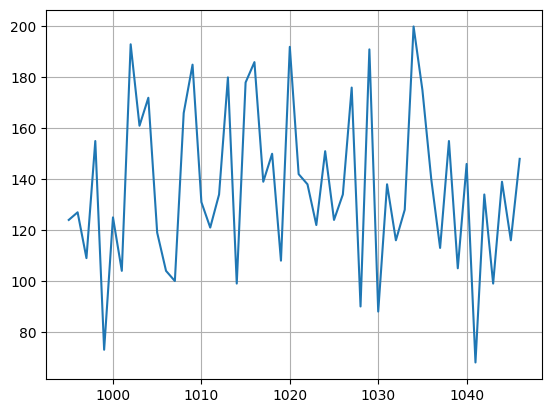

In [4]:
df_last = df.head(52)

t = np.array(df_last.sort_values(by=['SEQ']).SUM)
s = np.array(df_last.sort_values(by=['SEQ']).SEQ)

fig, ax = plt.subplots()
ax.plot(s, t)
ax.grid()

plt.show()

In [77]:
df_last = df.head(52)
df_last['SUM_DIFF'] = df_last['SUM'] - df_last['SUM'].shift(1)
# df_last
df_sum_diff = df_last[(df_last['SUM'] >= 140) & (df_last['SUM'] <= 160) & (~df_last['SUM_DIFF'].isnull())]
df_sum_diff

,SEQ,DT,NUM1,NUM2,NUM3,NUM4,NUM5,NUM6,SUM,dict_ea,SUM_DIFF
6,1040,2022-11-05,8,16,26,29,31,36,146,"{'SEQ_EA': 0, 'ODD_EA': 2, 'EVEN_EA': 4}",78.0
8,1038,2022-10-22,7,16,24,27,37,44,155,"{'SEQ_EA': 0, 'ODD_EA': 3, 'EVEN_EA': 3}",50.0
10,1036,2022-10-08,2,5,22,32,34,45,140,"{'SEQ_EA': 0, 'ODD_EA': 2, 'EVEN_EA': 4}",27.0
22,1024,2022-07-16,9,18,20,22,38,44,151,"{'SEQ_EA': 0, 'ODD_EA': 1, 'EVEN_EA': 5}",27.0
25,1021,2022-06-25,12,15,17,24,29,45,142,"{'SEQ_EA': 0, 'ODD_EA': 4, 'EVEN_EA': 2}",4.0
28,1018,2022-06-04,3,19,21,25,37,45,150,"{'SEQ_EA': 0, 'ODD_EA': 6, 'EVEN_EA': 0}",42.0
48,998,2022-01-15,13,17,18,20,42,45,155,"{'SEQ_EA': 1, 'ODD_EA': 3, 'EVEN_EA': 3}",82.0


In [82]:
df.head(1).SUM + round(df_sum_diff.SUM_DIFF.median(), 0)

0    190.0
Name: SUM, dtype: float64

In [87]:
list_nums = ['SUM']
for i in range(1, 7):
    list_nums.append(f'NUM{i}')

for col in list_nums:
    print(col, df_sum_diff[col].median())

SUM 150.0
NUM1 8.0
NUM2 16.0
NUM3 21.0
NUM4 25.0
NUM5 37.0
NUM6 45.0


In [ ]:
list_num = []
for i in range(1, 50):
    list_num.append(i)

for val in list(combinations(list_num, 6)):
    if sum(list(val)) == 190:
        print(list(val))

In [10]:
# 이전 회차과의 차이
df_diff = df.head(2)
df_diff

,SEQ,DT,NUM1,NUM2,NUM3,NUM4,NUM5,NUM6,SUM,dict_ea
0,1046,2022-12-17,7,16,25,29,35,36,148,"{'SEQ_EA': 1, 'ODD_EA': 4, 'EVEN_EA': 2}"
1,1045,2022-12-10,6,14,15,19,21,41,116,"{'SEQ_EA': 1, 'ODD_EA': 4, 'EVEN_EA': 2}"


In [59]:
list_num_cols = [
    'NUM1','NUM2','NUM3','NUM4','NUM5','NUM6'
]

df_diff = df.head(2)
for col in list_num_cols:
    df_diff[f'{col}_DIFF'] = df_diff[col] - df_diff[col].shift(-1)
    
df_diff

,SEQ,DT,NUM1,NUM2,NUM3,NUM4,NUM5,NUM6,SUM,dict_ea,NUM1_DIFF,NUM2_DIFF,NUM3_DIFF,NUM4_DIFF,NUM5_DIFF,NUM6_DIFF
0,1046,2022-12-17,7,16,25,29,35,36,148,"{'SEQ_EA': 1, 'ODD_EA': 4, 'EVEN_EA': 2}",1.0,2.0,10.0,10.0,14.0,-5.0
1,1045,2022-12-10,6,14,15,19,21,41,116,"{'SEQ_EA': 1, 'ODD_EA': 4, 'EVEN_EA': 2}",NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
list_num_cols = [
    'NUM1','NUM2','NUM3','NUM4','NUM5','NUM6'
]

df_diff = df.head(52)
for col in list_num_cols:
    df_diff[f'{col}_DIFF'] = df_diff[col] - df_diff[col].shift(-1)
    
df_result = df_diff[
    (df_diff['NUM6_DIFF'] < 0) & (df_diff['NUM1_DIFF'] > 0) & (df_diff['NUM2_DIFF'] > 0) & (df_diff['NUM3_DIFF'] > 0) & (df_diff['NUM4_DIFF'] > 0) & (df_diff['NUM5_DIFF'] > 0) 
].iloc[1:]

df_result

,SEQ,DT,NUM1,NUM2,NUM3,NUM4,NUM5,NUM6,SUM,dict_ea,NUM1_DIFF,NUM2_DIFF,NUM3_DIFF,NUM4_DIFF,NUM5_DIFF,NUM6_DIFF
12,1034,2022-09-24,26,31,32,33,38,40,200,"{'SEQ_EA': 2, 'ODD_EA': 2, 'EVEN_EA': 4}",23.0,20.0,17.0,13.0,3.0,-4.0
33,1013,2022-04-30,21,22,26,34,36,41,180,"{'SEQ_EA': 1, 'ODD_EA': 2, 'EVEN_EA': 4}",16.0,11.0,8.0,14.0,1.0,-4.0


In [62]:
list_df = []
for seq in list(df_result.SEQ.unique()):
    list_df.append(df_diff[df_diff['SEQ'] == seq + 1])
df_next = pd.concat(list_df)
df_next

,SEQ,DT,NUM1,NUM2,NUM3,NUM4,NUM5,NUM6,SUM,dict_ea,NUM1_DIFF,NUM2_DIFF,NUM3_DIFF,NUM4_DIFF,NUM5_DIFF,NUM6_DIFF
11,1035,2022-10-01,9,14,34,35,41,42,175,"{'SEQ_EA': 2, 'ODD_EA': 3, 'EVEN_EA': 3}",-17.0,-17.0,2.0,2.0,3.0,2.0
32,1014,2022-05-07,3,11,14,18,26,27,99,"{'SEQ_EA': 1, 'ODD_EA': 3, 'EVEN_EA': 3}",-18.0,-11.0,-12.0,-16.0,-10.0,-14.0


In [63]:
pd.concat([df_next, df_result]).sort_values(by=['DT'], ascending=False)

,SEQ,DT,NUM1,NUM2,NUM3,NUM4,NUM5,NUM6,SUM,dict_ea,NUM1_DIFF,NUM2_DIFF,NUM3_DIFF,NUM4_DIFF,NUM5_DIFF,NUM6_DIFF
11,1035,2022-10-01,9,14,34,35,41,42,175,"{'SEQ_EA': 2, 'ODD_EA': 3, 'EVEN_EA': 3}",-17.0,-17.0,2.0,2.0,3.0,2.0
12,1034,2022-09-24,26,31,32,33,38,40,200,"{'SEQ_EA': 2, 'ODD_EA': 2, 'EVEN_EA': 4}",23.0,20.0,17.0,13.0,3.0,-4.0
32,1014,2022-05-07,3,11,14,18,26,27,99,"{'SEQ_EA': 1, 'ODD_EA': 3, 'EVEN_EA': 3}",-18.0,-11.0,-12.0,-16.0,-10.0,-14.0
33,1013,2022-04-30,21,22,26,34,36,41,180,"{'SEQ_EA': 1, 'ODD_EA': 2, 'EVEN_EA': 4}",16.0,11.0,8.0,14.0,1.0,-4.0


In [52]:
# Average

df_result.NUM2_DIFF.mean()
df_result.NUM3_DIFF.mean()
df_result.NUM4_DIFF.mean()
df_result.NUM5_DIFF.mean()
df_result.NUM6_DIFF.mean()

-17.5

-14.0

-5.0

-7.0

-3.5

-6.0

In [57]:
df_select = df_diff.head(1)
df_select['NUM1'] = round(df_select['NUM1'] + df_result.NUM1_DIFF.mean(), 0)
df_select['NUM2'] = round(df_select['NUM2'] + df_result.NUM2_DIFF.mean(), 0)
df_select['NUM3'] = round(df_select['NUM3'] + df_result.NUM3_DIFF.mean(), 0)
df_select['NUM4'] = round(df_select['NUM4'] + df_result.NUM4_DIFF.mean(), 0)
df_select['NUM5'] = round(df_select['NUM5'] + df_result.NUM5_DIFF.mean(), 0)
df_select['NUM6'] = round(df_select['NUM6'] + df_result.NUM6_DIFF.mean(), 0)

df_select

,SEQ,DT,NUM1,NUM2,NUM3,NUM4,NUM5,NUM6,SUM,dict_ea,NUM1_DIFF,NUM2_DIFF,NUM3_DIFF,NUM4_DIFF,NUM5_DIFF,NUM6_DIFF
0,1046,2022-12-17,-10.0,2.0,20.0,22.0,32.0,30.0,148,"{'SEQ_EA': 1, 'ODD_EA': 4, 'EVEN_EA': 2}",1.0,2.0,10.0,10.0,14.0,-5.0


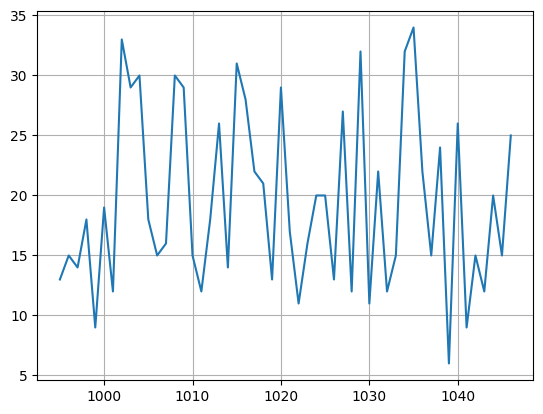

In [7]:
t = np.array(df_last.sort_values(by=['SEQ']).NUM3)
s = np.array(df_last.sort_values(by=['SEQ']).SEQ)

fig, ax = plt.subplots()
ax.plot(s, t)
ax.grid()

plt.show()

In [57]:
list_hap = []
list_seq = [1037, 1039, 1043]
for seq in list_seq:
    this_hap = df_last[df_last['SEQ'] == seq].SUM.sum()
    next_hap = df_last[df_last['SEQ'] == seq + 1].SUM.sum()
    list_hap.append(next_hap - this_hap)
list_hap
np.mean(list_hap)

seq_hap = df_last[df_last['SEQ'] == seq].SUM.sum() + np.mean(list_hap)
seq_hap - 10
seq_hap + 10

[42, 41, 40]

41.0

130.0

150.0

In [62]:
list_six_combination = list(combinations(list_result, 6))
for nums in list_six_combination:
    dict_ea = get_num_ea(nums)
    if sum(nums) >= 116:
        print(nums, sum(nums), dict_ea['SEQ_EA'], dict_ea['ODD_EA'], dict_ea['EVEN_EA'])

(10, 13, 14, 25, 26, 30) 118 2 2 4


In [17]:
from itertools import permutations, combinations

list_six_combination = list(combinations(list_result, 6))
for nums in list_six_combination:
    dict_ea = get_num_ea(nums)
    if (dict_ea['SEQ_EA'] < 2 and dict_ea['ODD_EA'] <= dict_ea['EVEN_EA'] and (sum(nums) > 120)):
        print(nums, sum(nums), dict_ea['SEQ_EA'], dict_ea['ODD_EA'], dict_ea['EVEN_EA'])

In [ ]:
num = [4, 10, 13, 21, 25, 28, 30]
dict_ea = get_num_ea(num)
print(num, sum(num), dict_ea['SEQ_EA'], dict_ea['ODD_EA'], dict_ea['EVEN_EA'])

[4, 10, 13, 21, 25, 28, 30] 131 0 3 4


In [17]:
num = [4, 10, 13, 21, 27, 28, 30]
dict_ea = get_num_ea(num)
print(num, sum(num), dict_ea['SEQ_EA'], dict_ea['ODD_EA'], dict_ea['EVEN_EA'])

[4, 10, 13, 21, 27, 28, 30] 133 1 3 4


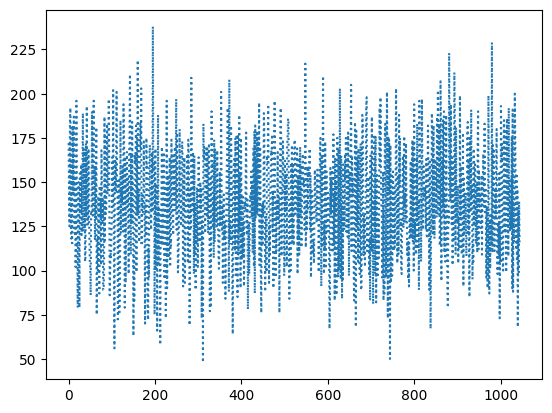

# 연속번호, 홀짝, 구간별 출현횟수, 최근 12주간 미출현 번호 등으로 짜맞추기를 한다.

In [39]:
list_nums = [8,16,24,27,37,44]
get_seq_num_ea(list_nums)

0

In [10]:
# 최근 15주간을 기준으로 상위 30% 이내의 값으로 수렴하게 한다.
df_selected = df_number.head(15)
df_selected

,SEQ,DT,NUM1,NUM2,NUM3,NUM4,NUM5,NUM6
0,1038,2022-10-22,7,16,24,27,37,44
1,1037,2022-10-15,2,14,15,22,27,33
2,1036,2022-10-08,2,5,22,32,34,45
3,1035,2022-10-01,9,14,34,35,41,42
4,1034,2022-09-24,26,31,32,33,38,40
5,1033,2022-09-17,3,11,15,20,35,44
6,1032,2022-09-10,1,6,12,19,36,42
7,1031,2022-09-03,6,7,22,32,35,36
8,1030,2022-08-27,2,5,11,17,24,29
9,1029,2022-08-20,12,30,32,37,39,41


In [117]:
list_a = [3,5,1,4,7]

In [118]:
list_a.sort()

In [119]:
print(list_a.sort())

None


In [120]:
sorted(list_a, reverse=False)

[1, 3, 4, 5, 7]

In [126]:
from itertools import permutations, combinations

In [127]:
# 값의 유일한 조합
len(list(combinations(list_a, 4)))
list(combinations(list_a, 4))

5

[(1, 3, 4, 5), (1, 3, 4, 7), (1, 3, 5, 7), (1, 4, 5, 7), (3, 4, 5, 7)]

In [ ]:
# 값이 중복되는 조합
len(list(permutations(list_a, 4)))
list(permutations(list_a, 4))

In [133]:
df_sum = df_last.head(5)[['NUM1','NUM2','NUM3']]
df_sum

,NUM1,NUM2,NUM3
0,7,16,24
1,2,14,15
2,2,5,22
3,9,14,34
4,26,31,32


In [137]:
df_sum['HAP'] = (df_sum['NUM1'] + df_sum['NUM2'] + df_sum['NUM3'])
df_sum

,NUM1,NUM2,NUM3,HAP
0,7,16,24,47
1,2,14,15,31
2,2,5,22,29
3,9,14,34,57
4,26,31,32,89


In [129]:
def sum_num(num1, num2, num3):
    return num1 + num2 + num3

In [138]:
df_sum['HAP'] = df_sum.apply(lambda X: sum_num(X['NUM1'], X['NUM2'], X['NUM3']), axis=1)
df_sum

,NUM1,NUM2,NUM3,HAP
0,7,16,24,47
1,2,14,15,31
2,2,5,22,29
3,9,14,34,57
4,26,31,32,89


In [17]:
import random
from itertools import combinations
import numpy as np

[1, 2, 45, 47, 48, 49]
[1, 3, 44, 47, 48, 49]
[1, 3, 45, 46, 48, 49]
[1, 4, 43, 47, 48, 49]
[1, 4, 44, 46, 48, 49]
[1, 4, 45, 46, 47, 49]
[1, 5, 42, 47, 48, 49]
[1, 5, 43, 46, 48, 49]
[1, 5, 44, 45, 48, 49]
[1, 5, 44, 46, 47, 49]
[1, 5, 45, 46, 47, 48]
[1, 6, 41, 47, 48, 49]
[1, 6, 42, 46, 48, 49]
[1, 6, 43, 45, 48, 49]
[1, 6, 43, 46, 47, 49]
[1, 6, 44, 45, 47, 49]
[1, 6, 44, 46, 47, 48]
[1, 7, 40, 47, 48, 49]
[1, 7, 41, 46, 48, 49]
[1, 7, 42, 45, 48, 49]
[1, 7, 42, 46, 47, 49]
[1, 7, 43, 44, 48, 49]
[1, 7, 43, 45, 47, 49]
[1, 7, 43, 46, 47, 48]
[1, 7, 44, 45, 46, 49]
[1, 7, 44, 45, 47, 48]
[1, 8, 39, 47, 48, 49]
[1, 8, 40, 46, 48, 49]
[1, 8, 41, 45, 48, 49]
[1, 8, 41, 46, 47, 49]
[1, 8, 42, 44, 48, 49]
[1, 8, 42, 45, 47, 49]
[1, 8, 42, 46, 47, 48]
[1, 8, 43, 44, 47, 49]
[1, 8, 43, 45, 46, 49]
[1, 8, 43, 45, 47, 48]
[1, 8, 44, 45, 46, 48]
[1, 9, 38, 47, 48, 49]
[1, 9, 39, 46, 48, 49]
[1, 9, 40, 45, 48, 49]
[1, 9, 40, 46, 47, 49]
[1, 9, 41, 44, 48, 49]
[1, 9, 41, 45, 47, 49]
[1, 9, 41, 